<a href="https://colab.research.google.com/github/lucasjirwin/NYPD-Network-Analysis/blob/main/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx 
import numpy as np 



In [ ]:
# Read in the data
import pandas as pd 

Officer_data = pd.read_csv("capstat_expanded_dataset.csv")

Complaints_data = pd.read_csv("CCRB_database_raw.csv")
pd.DataFrame.head(Officer_data)

,Unnamed: 0,First Name,Last Name,Full Name,Current Rank,Associated shield #,Last known command,Current county,Started,All Ranks,All Salaries,Ceased,Previous shield
0,0,Hans,Francois,Hans D. Francois,Police Officer,25825.0,Special Operations Division,Kings,"December 8, 1997",[FY2000][Police Officer],"[FY2018][$85,292] [FY2017][$85,292] [FY2016][$...",NaN,NaN
1,1,Christopher,Boerke,Christopher M. Boerke,Detective Second Grade,NaN,NaN,New York,"February 28, 1994",[FY2014][Detective Second Grade] [FY2002][Dete...,"[FY2016][$100,044] [FY2015][$100,044] [FY2014]...",2015.0,NaN
2,2,Walter,Cacaj,Walter G. Cacaj,Sergeant,NaN,NaN,New York,"January 20, 1994",[FY2000][Sergeant],"[FY2016][$100,044] [FY2015][$100,044] [FY2013]...",2013.0,NaN
3,3,Santiago,Frances,Santiago Frances,Detective Second Grade,NaN,NaN,New York,"February 28, 1994",[FY2015][Detective Second Grade] [FY2006][Dete...,"[FY2016][$102,054] [FY2015][$101,044] [FY2014]...",2016.0,NaN
4,4,Elio,Chianetta,Elio L. Chianetta,Police Officer,NaN,NaN,Richmond,"January 7, 2015",[FY2015][Police Officer],"[FY2018][$54,394] [FY2017][$48,666] [FY2016][$...",NaN,NaN


In [ ]:
pd.DataFrame.head(Complaints_data)

,AsOfDate,Unique Id,First Name,Last Name,Rank,Command,ShieldNo,Complaint Id,Incident Date,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc
0,7/14/2020,43921,Richard,Aalbue,POM,H BKLYN,3619.0,6290465.0,NaN,Force,Force,Unsubstantiated,NaN,NaN
1,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8300607.0,NaN,Force,Force,Complainant Unavailable,NaN,NaN
2,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,8800504.0,2/15/1988,Force,Beat,Unsubstantiated,NaN,NaN
3,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/1992,Abuse of Authority,Vehicle Searched,Unsubstantiated,NaN,NaN
4,7/14/2020,52580,Walter,Aanonsen,LT,MOUNTED,0.0,9201176.0,4/2/1992,Discourtesy,Nasty Words,Unsubstantiated,NaN,NaN


In [ ]:
# Create data set with Names of Officers and Complaint Ids 
Complaint_ids_sorted_df = Complaints_data.sort_values(by = ['Complaint Id'])
Complaint_edges_df = Complaint_ids_sorted_df['First Name'] + ' ' + Complaint_ids_sorted_df['Last Name']
Complaint_ids_df = Complaint_ids_sorted_df['Complaint Id'].to_frame()
Complaint_edges_final = pd.concat((Complaint_ids_df, Complaint_edges_df), axis = 1)
# Drop N/A rows 
Complaint_edges_final = Complaint_edges_final.dropna()


In [ ]:
pd.DataFrame.tail(Complaint_edges_final)


,Complaint Id,0
61267,202002914.0,Steven Counihan
1038,202003070.0,Richard Accardi
189812,202003095.0,John Mchugh
322746,202003663.0,Joseph Zerella
322745,202003663.0,Joseph Zerella


In [ ]:
Police_graph = nx.Graph()

In [ ]:
Officer_nodes_df = Officer_data['First Name'] + ' ' + Officer_data['Last Name']
Officer_nodes_df = Officer_nodes_df.dropna()
Officer_nodes_df

0             Hans Francois
1        Christopher Boerke
2              Walter Cacaj
3          Santiago Frances
4            Elio Chianetta
                ...        
11844       Johnny Cardenas
11845       Anthony Amorese
11846      Steven Azzopardi
11847         Todd Berenson
11848          Miguel Abreu
Length: 11849, dtype: object

In [ ]:
print(nx.info(Police_graph))

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0



In [ ]:
Complaint_edges = pd.DataFrame.to_numpy(Complaint_edges_final)

Complaint_edges



array([[6278008.0, 'Nicholas Witkowich'],
       [6279005.0, 'Edward Moore'],
       [6279016.0, 'William Mcguire'],
       ...,
       [202003095.0, 'John Mchugh'],
       [202003663.0, 'Joseph Zerella'],
       [202003663.0, 'Joseph Zerella']], dtype=object)

In [ ]:
# Create the graph
Police_graph = nx.Graph()

In [ ]:
# Add edges from the newly constructed Complaint Data Set
n = 0
m = 0
for n in range(290642):
  current_id = Complaint_edges[n][0]
  current_list = [] 
  while (Complaint_edges[m][0] == current_id):
    if (Complaint_edges[m][1] not in current_list): 
      current_list.append(Complaint_edges[m][1])
    m += 1 
  for j in range(len(current_list)) :
    k = j+1
    for k in range(len(current_list)):
      if (current_list[j] is not current_list[k]):
        Police_graph.add_edge(current_list[j],current_list[k],attr = current_id)



In [ ]:
# Remove edges which are self-loops to create a simple graph
Police_graph.remove_edges_from(nx.selfloop_edges(Police_graph))

In [ ]:
# 35760 nodes, 71425 edges in Police graph
nx.info(Police_graph)

'Name: \nType: Graph\nNumber of nodes: 35760\nNumber of edges: 71425\nAverage degree:   3.9947'

In [ ]:
#to_be_removed = [x for  x in Police_graph.nodes() if Police_graph.degree(x) <= 10]

#for x in to_be_removed:
   # Police_graph.remove_node(x)

In [ ]:
# Calculate Pagerank of all Officer Nodes
pagerank = nx.algorithms.pagerank(Police_graph)
pagerank


{'William Mcnulty': 1.4434483082131742e-05,
 'Nicholas Witkowich': 3.766306424309585e-05,
 'Charles Kammerdener': 3.596684974482662e-05,
 'Philip Duffy': 2.3962883852418902e-05,
 'Jerome Loverdi': 3.737415220950571e-05,
 'Michael Corbett': 2.3363491424018435e-05,
 'Edward Horton': 1.0373941810055505e-05,
 'James Romagnoli': 2.8044846875343684e-05,
 'Ralph Pascullo': 5.556093393990027e-05,
 'Martin Mckinney': 3.427384245820456e-05,
 'Lorraine Mckenna': 1.1671289054028008e-05,
 'Stephen Tellone': 2.3962883852418902e-05,
 'David Gallinari': 3.4101879303392296e-05,
 'Joseph Clarino': 1.4259530093807091e-05,
 'Michael Phipps': 3.0361318071469197e-05,
 'James Hynes': 2.1944971733710603e-05,
 'Richard Muller': 2.349462172846054e-05,
 'Michael Curcio': 3.2387680639616425e-05,
 'Carl Ferrigno': 2.3952708395722792e-05,
 'John Zerillo': 4.676860979082126e-05,
 'Daniel Mahoney': 9.38731404197017e-05,
 'John Garcia': 5.2919114860409926e-05,
 'Vincent Colombo': 1.4097149346637573e-05,
 'John Pawliko

In [ ]:
# Sort Officers by Pagerank scores
pagerank_sorted = sorted(pagerank.items(), key = lambda a: a[1], reverse = True )

In [ ]:
pagerank_sorted

[('Michael Murphy', 0.00036198550133063347),
 ('Michael Sullivan', 0.0002648293699355067),
 ('Michael Gonzalez', 0.00024131635392676774),
 ('Jose Rodriguez', 0.00022513908583854484),
 ('Carlos Martinez', 0.00020495473682638103),
 ('Michael Rodriguez', 0.0002005286844230528),
 ('Dennis Ferber', 0.00020008388802300814),
 ('Michael Kelly', 0.00019186118964750125),
 ('Gary Messina', 0.00019152400394690491),
 ('John Mcdermott', 0.0001886012085949405),
 ('Luis Martinez', 0.0001870708400057236),
 ('Richard Johnson', 0.0001850803405396024),
 ('Robert Rodriguez', 0.00018487950569060093),
 ('Dolores Pilnacek', 0.00018360561329260264),
 ('John Mccarthy', 0.00018318229985881375),
 ('Jose Ramos', 0.0001825356376318322),
 ('John Ryan', 0.00017941744571038924),
 ('James Reilly', 0.00017932555121722766),
 ('James Williams', 0.00017838409304022433),
 ('Christophe Connolly', 0.0001781042793368324),
 ('Mathew Reich', 0.00017644456566229141),
 ('Anthony Gonzalez', 0.00017523352485389261),
 ('Brian Mullen'

In [ ]:
#from google.colab import files
#df.to_csv('filename.csv') 
#files.download('filename.csv')

In [ ]:
#a = 1
3pagerank_df = pd.Series(pagerank)

In [ ]:
#pagerank_df = pagerank_df.to_frame()

In [ ]:
#pagerank_df

,0
William Mcnulty,0.000014
Nicholas Witkowich,0.000038
Charles Kammerdener,0.000036
Philip Duffy,0.000024
Jerome Loverdi,0.000037
...,...
Sean Bartlett,0.000025
Matthew Neubauer,0.000025
Malcolm Hart,0.000028
Matthew Duffy,0.000028


In [ ]:
#from google.colab import files
#pagerank_df.to_csv('pagerankOfficers.csv') 
#files.download('pagerankOfficers.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Top 20 officers with highest pagerank scores
pagerank_sorted[:20]

[('Michael Murphy', 0.00036198550133063347),
 ('Michael Sullivan', 0.0002648293699355067),
 ('Michael Gonzalez', 0.00024131635392676774),
 ('Jose Rodriguez', 0.00022513908583854484),
 ('Carlos Martinez', 0.00020495473682638103),
 ('Michael Rodriguez', 0.0002005286844230528),
 ('Dennis Ferber', 0.00020008388802300814),
 ('Michael Kelly', 0.00019186118964750125),
 ('Gary Messina', 0.00019152400394690491),
 ('John Mcdermott', 0.0001886012085949405),
 ('Luis Martinez', 0.0001870708400057236),
 ('Richard Johnson', 0.0001850803405396024),
 ('Robert Rodriguez', 0.00018487950569060093),
 ('Dolores Pilnacek', 0.00018360561329260264),
 ('John Mccarthy', 0.00018318229985881375),
 ('Jose Ramos', 0.0001825356376318322),
 ('John Ryan', 0.00017941744571038924),
 ('James Reilly', 0.00017932555121722766),
 ('James Williams', 0.00017838409304022433),
 ('Christophe Connolly', 0.0001781042793368324)]

In [ ]:
# Calculate Degree Centrality 
Degree_Centrality = nx.degree_centrality(Police_graph)


In [ ]:
#degree_df = pd.Series(Degree_Centrality)

In [ ]:
#degree_df = degree_df.to_frame()

In [ ]:
#from google.colab import files
#degree_df.to_csv('degreeOfficers.csv') 
#files.download('degreeOfficers.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Sort Officers by Degree Centrality
Sorted_Degree_Centrality = sorted(Degree_Centrality.items(), key=lambda item: item[1], reverse=True)

In [ ]:
# Top 20 Officers based on Degree Centrality 
Sorted_Degree_Centrality[:20]

[('Michael Murphy', 0.0019016191727956597),
 ('Michael Gonzalez', 0.001538074330937666),
 ('Michael Sullivan', 0.0014541793674319751),
 ('Dennis Ferber', 0.0012024944769149025),
 ('Christophe Ward', 0.0012024944769149025),
 ('Richard Johnson', 0.0011745294890796723),
 ('Michael Rodriguez', 0.0011745294890796723),
 ('Mathew Reich', 0.0011745294890796723),
 ('Luis Martinez', 0.0011185995134092117),
 ('Jose Ramos', 0.0011185995134092117),
 ('Carlos Martinez', 0.0011185995134092117),
 ('Michael Kelly', 0.0010906345255739813),
 ('Gary Messina', 0.0010906345255739813),
 ('Christophe Connolly', 0.0010906345255739813),
 ('John Mcdermott', 0.0010626695377387511),
 ('John Mccarthy', 0.0010626695377387511),
 ('Michael White', 0.0010626695377387511),
 ('Jose Rodriguez', 0.0010347045499035207),
 ('Michael Smith', 0.0010347045499035207),
 ('Anthony Gonzalez', 0.0010347045499035207)]

In [ ]:
# Calculate Eigenvector Centrality
Eigenvector_Centrality = nx.eigenvector_centrality(Police_graph)

In [ ]:
#eigenvector_df = pd.Series(Eigenvector_Centrality)

In [ ]:
#eigenvector_df = eigenvector_df.to_frame()

In [ ]:
#from google.colab import files
#eigenvector_df.to_csv('eigenvectorOfficers.csv') 
#files.download('eigenvectorOfficers.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Sort
Sorted_Eigenvector_Centrality = sorted(Eigenvector_Centrality.items(), key=lambda item: item[1], reverse=True)


In [ ]:
# Top 10% of Eigenvector Centrality Officers
Sorted = Sorted_Eigenvector_Centrality[:3576]
Sorted = np.array(Sorted)

In [ ]:
nx.info(Police_graph)

'Name: \nType: Graph\nNumber of nodes: 35760\nNumber of edges: 71425\nAverage degree:   3.9947'

In [ ]:
New_graph = Police_graph.subgraph(Sorted[:,0])
nx.info(New_graph)

'Name: \nType: Graph\nNumber of nodes: 3576\nNumber of edges: 11030\nAverage degree:   6.1689'

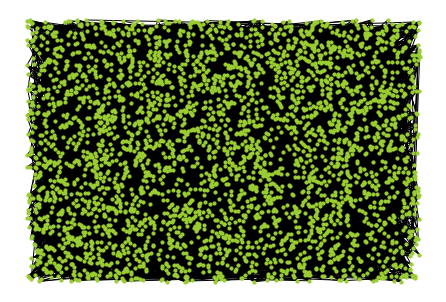

In [ ]:
# Draw the graph with the top 100 nodes sorted by Eigenvector Centrality 
pos = nx.drawing.layout.random_layout(New_graph)

nx.draw(New_graph, pos=pos,
        node_color='yellowgreen', node_size=10)

In [ ]:
Degree_centrality = sorted(nx.degree_centrality(Police_graph),key=lambda a: a[1], reverse=True)
Degree_centrality_np = np.array(Degree_centrality)
Sorted_degreeCent = Degree_centrality_np[:1000]
New_graph_2 = Police_graph.subgraph(Sorted_degreeCent)

In [ ]:
Sorted_2 = Sorted_Degree_Centrality[:3576]
Sorted_2 = np.array(Sorted_2)

In [ ]:
New_graph_2 = Police_graph.subgraph(Sorted_2[:,0])
nx.info(New_graph_2)

'Name: \nType: Graph\nNumber of nodes: 3576\nNumber of edges: 9822\nAverage degree:   5.4933'

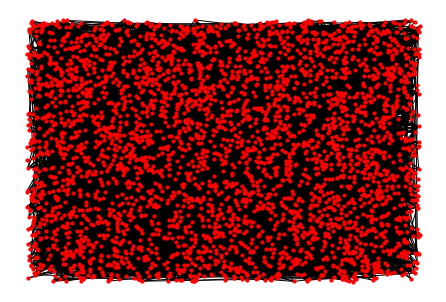

In [ ]:
pos = nx.drawing.layout.random_layout(New_graph_2)

nx.draw(New_graph_2, pos=pos,
        node_color='red', node_size=10)

In [ ]:
Sorted_3 = pagerank_sorted[:3576]
Sorted_3 = np.array(Sorted_3)

In [ ]:
New_graph_3 = Police_graph.subgraph(Sorted_3[:,0])
nx.info(New_graph_3)

'Name: \nType: Graph\nNumber of nodes: 3576\nNumber of edges: 7656\nAverage degree:   4.2819'

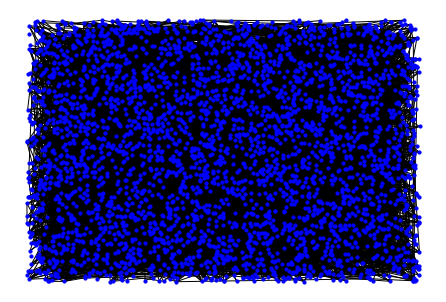

In [ ]:
pos = nx.drawing.layout.random_layout(New_graph_3)

nx.draw(New_graph_3, pos=pos,
        node_color='blue', node_size=10)

In [ ]:
race_officers_df = pd.read_csv('Racist_Officers.csv')
race_officers_df

,Black,Hispanic,Punch/Kick
0,Michael Elliott,Anthony Agnelli,John Coghlan
1,Robert Marge,Rosana Roig,Thomas Delvecchio
2,John Coghlan,Joseph Grimm,Patanthony Venezia
3,James Carfora,Michael Donoghue,James Carfora
4,Robert Rose,Douglas Walden,Angela Sands
...,...,...,...
48254,Kevin Zweigbaum,Jon Zweigbaum,Jon Zweigbaum
48255,Robert Zwickis,Kevin Zweigbaum,Kevin Zweigbaum
48256,Patrick Zwiebel,Patrick Zwiebel,Patrick Zwiebel
48257,Charles Zwilling,Charles Zwilling,Charles Zwilling


In [ ]:
race_officers = race_officers_df.to_numpy()
race_officers.shape
combined = np.hstack((race_officers[:636,0], race_officers[:635,1]))

In [ ]:
combined.shape

(1100,)

In [ ]:
Police_graph_combined = Police_graph.subgraph(combined)

In [ ]:
nx.info(Police_graph_combined)

'Name: \nType: Graph\nNumber of nodes: 834\nNumber of edges: 415\nAverage degree:   0.9952'

In [ ]:
Police_graph_punch = Police_graph.subgraph(race_officers[:1055,2])
Police_graph_black = Police_graph.subgraph(race_officers[:1124,0])
Police_graph_hisp = Police_graph.subgraph(race_officers[:1113,1])

In [ ]:
#print(nx.info(Police_graph_punch))
#print(nx.info(Police_graph_black))
#print(nx.info(Police_graph_hisp))
print(nx.info(Police_graph_combined))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 440
Average degree:   0.8800


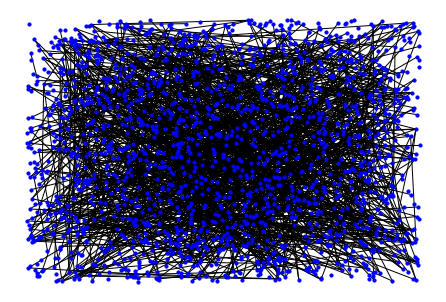

In [ ]:
pos = nx.drawing.layout.random_layout(Police_graph_black)

nx.draw(Police_graph_black, pos=pos,
        node_color='blue', node_size=10)

In [ ]:
HITS = np.array(HITS)
HITS

array([{'William Mcnulty': 2.7830170420396162e-06, 'Nicholas Witkowich': 8.099146268620688e-06, 'Charles Kammerdener': 0.0, 'Philip Duffy': 0.0, 'Jerome Loverdi': 2.315513106666645e-05, 'Michael Corbett': 3.256618962725107e-05, 'Edward Horton': 5.078738143131603e-07, 'James Romagnoli': 5.947199152630255e-06, 'Ralph Pascullo': 2.448996568581033e-05, 'Martin Mckinney': 2.192267215914693e-06, 'Lorraine Mckenna': 1.8721335613291762e-07, 'Stephen Tellone': 0.0, 'David Gallinari': 2.3750270982614973e-05, 'Joseph Clarino': 2.521764859770555e-06, 'Michael Phipps': 5.779579570261151e-06, 'James Hynes': 2.2596446850122627e-05, 'Richard Muller': 8.348843498257493e-06, 'Michael Curcio': 2.330490405828256e-06, 'Carl Ferrigno': 2.301113450870965e-06, 'John Zerillo': 3.9620243210593534e-05, 'Daniel Mahoney': 0.00021797845121655502, 'John Garcia': 5.364205843830044e-06, 'Vincent Colombo': 6.1813363488465405e-06, 'John Pawlikowsky': 2.106736833555199e-06, 'Richard Verde': 2.3266059016686003e-08, 'Sonia

In [ ]:
Police_graph_temp = nx.Graph.copy(Police_graph)

In [ ]:
to_be_removed = [x for  x in Police_graph_temp.nodes() if Police_graph_temp.degree(x) <= 10]

for x in to_be_removed:
    Police_graph_temp.remove_node(x)

In [ ]:
nx.info(Police_graph_temp)


'Name: \nType: Graph\nNumber of nodes: 2241\nNumber of edges: 5428\nAverage degree:   4.8443'

In [ ]:
def triadic(e):
  triadic_edges = []
  
  for i in e:
    a, b = i
  
    for j in e:
      x, y = j
  
      if i != j:
        if a == x and (b, y) not in e :
          triadic_edges.append((b, y))
        if a == y and (b, x) not in e:
          triadic_edges.append((b, x))
        if b == x and (a, y) not in e:
          triadic_edges.append((a, y))
        if b == y and (a, x) not in e:
          triadic_edges.append((a, x))
  
  return triadic_edges

Triadic_edges = triadic(Police_graph_temp.edges())

In [ ]:
Police_graph_new = nx.Graph.copy(Police_graph_temp)

In [ ]:
Police_graph_new.add_edges_from(Triadic_edges)

In [ ]:
# Triadic closure added 113,300 edges 
print(nx.info(Police_graph_temp))

print(nx.info(Police_graph_new))

Name: 
Type: Graph
Number of nodes: 8045
Number of edges: 24199
Average degree:   6.0159
Name: 
Type: Graph
Number of nodes: 8045
Number of edges: 137499
Average degree:  34.1825
